# Redes Neuronales - Aprendizaje no supervisado

Autor: Alexander Leaño
Fecha: 21 de Noviembre de 2024

## Problema 1

Se busca realizar el analisis de una red neuronal lineal con una sola capa de neuronas. La red neuronal tiene 4 entradas y una salida. La ecuación de la salida es:

$$
V = \sum_{j=1}^4 w_j \xi_j \tag{1}
$$

La distribución de probabilidad de las entradas es una distribución Gaussiana con matriz de correlación $\Sigma$:

$$
P(\bar{\xi}) = \frac{1}{(2\pi)^2 \sqrt{\det(\Sigma)}} 
\exp\left(-\frac{1}{2} \bar{\xi}^T \Sigma^{-1} \bar{\xi}\right) \tag{2}
$$

Donde:

$$
\Sigma = 
\begin{pmatrix}
2 & 1 & 1 & 1 \\
1 & 2 & 1 & 1 \\
1 & 1 & 2 & 1 \\
1 & 1 & 1 & 2 \\
\end{pmatrix} \tag{3}
$$


Para esto, se parte de pesos $w_j$ aleatorios y pequeños para aplicar la regla de aprendizaje:

$$
\Delta w_j = \eta V (\xi_j - V w_j) \tag{4}
$$

Se busca comparar los valores asintóticos de los pesos con los autovectores de la matriz $\Sigma$.

*Nota*: Como una ayuda para el cálculo va a  ser útil utilizar la raíz cuadrada de la matriz de correlación:

$$
\Sigma^{1/2} = 
\begin{pmatrix}
1.309 & 0.309 & 0.309 & 0.309 \\
0.309 & 1.309 & 0.309 & 0.309 \\
0.309 & 0.309 & 1.309 & 0.309 \\
0.309 & 0.309 & 0.309 & 1.309 \\
\end{pmatrix} \tag{5}
$$



(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

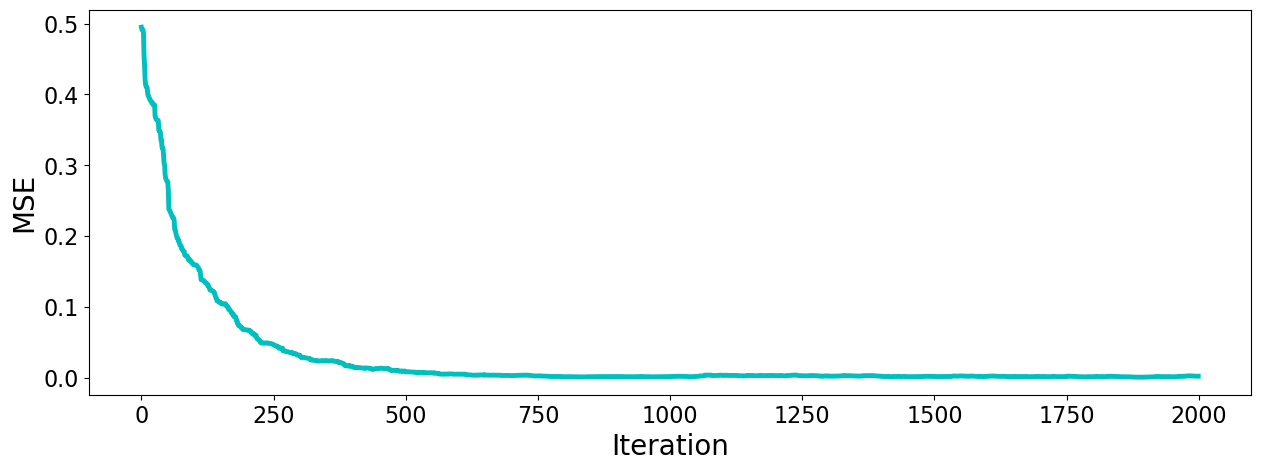

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_iterations = 2000
learning_rate = 0.0005

# Sigma matrix (input covariance approximation)
# Σ^(1/2) matrix
covariance_matrix = 0.309 * np.ones([4, 4]) + np.diag(np.ones(4))

# Initialize random weights
weights = np.random.uniform(size=[1, 4])

# Compute eigenvalues and eigenvectors of a related matrix
Sigma = np.ones([4, 4]) + np.diag(np.ones(4))
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
max_eigen_index = np.argmax(eigenvalues)  # Index of the largest eigenvalue
principal_eigenvector = eigenvectors[:, max_eigen_index]

# Track error over iterations
mse_error = np.zeros(num_iterations)

# Learning process
for iteration in range(num_iterations):
    # Generate random input sample
    input_sample = np.dot(covariance_matrix, np.random.randn(4, 1)).flatten()

    # Compute output (network activation)
    V = weights.dot(input_sample)

    # Update weights using the learning rule
    weights += learning_rate * V * (input_sample - V * weights)

    # Calculate Mean Squared Error (MSE) against the principal eigenvector
    mse_error[iteration] = np.sum((principal_eigenvector - weights) ** 2)

# Plot the Mean Squared Error (MSE) over iterations
plt.figure(figsize=(15, 5))
plt.plot(mse_error, 'c', linewidth=3.5)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.savefig("figure1.png")




## Problema 2


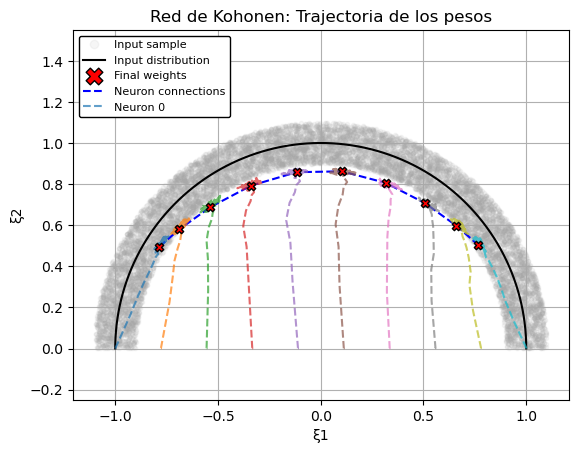

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Input distribution parameters
r_min, r_max = 0.9, 1.1
theta_min, theta_max = 0, np.pi

# Kohonen network parameters
num_neurons = 10  # Number of output neurons

num_iterations = 10000  # Number of training steps

# Decay
eta = 0.01  # Learning rate
sigma = 2  # Neighborhood radius


# Generate random inputs from the defined distribution
def generate_input():
    r = np.random.uniform(r_min, r_max)
    theta = np.random.uniform(theta_min, theta_max)
    return np.array([r * np.cos(theta), r * np.sin(theta)])

# Gaussian neighborhood function
def gaussian_neighborhood(i, i_star, sigma):
    # limit the overflow when sigma is too small
    if sigma < 1e-10:
        return 0
    return np.exp(-((i - i_star) ** 2) / (2 * sigma ** 2))

# Initialize weights randomly
# First column: ξ1, Second column: ξ2
# xi1 = np.random.uniform(r_min, r_max, num_neurons)
# xi2 = np.random.uniform(theta_min, theta_max, num_neurons)
xi1 = np.linspace(-1, 1, num_neurons) # Initial weights for ξ1
xi2 = np.ones(num_neurons) * 0  # Initial weights for ξ2
weights = np.concatenate([xi1.reshape(-1, 1), xi2.reshape(-1, 1)], axis=1)


# To store trajectories of the weights
weight_trajectories = [weights.copy()]

# input vector generated by function
# xi = generate_input()
xi = np.array([generate_input() for _ in range(num_iterations)])

# Training loop
for t in range(num_iterations):


    # Find the winning neuron (closest weight vector)
    distances = np.linalg.norm(xi[t,:] - weights, axis=1)
    i_star = np.argmax(-distances)
    
    # Update weights of each neuron
    for i in range(num_neurons):
        neighborhood_effect = gaussian_neighborhood(i, i_star, sigma)
        weights[i] += neighborhood_effect * eta * (xi[t,:] - weights[i,:])
    
    # Save weight positions at regular intervals
    if t % 100 == 0:  # Record every 100 iterations
        weight_trajectories.append(weights.copy())

# Plot results
# Input space (distribution)
theta = np.linspace(theta_min, theta_max, 300)
r = (r_min + r_max) / 2
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(xi[:,0], xi[:,1], '.', color="darkgray", label="Input sample",alpha=0.1)
plt.plot(x, y, label="Input distribution", color="black")

# Final weights
weights_x, weights_y = weights[:, 0], weights[:, 1]
plt.scatter(weights_x, weights_y, color="red", label="Final weights", edgecolors="black", marker="X", zorder=15)

# Neuron connections (final positions)
plt.plot(weights_x, weights_y, linestyle="--", color="blue", label="Neuron connections")


# Plot weight trajectories
for neuron in range(num_neurons):
    trajectory = np.array([w[neuron] for w in weight_trajectories])
    plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle="--", alpha=0.7, label=f"Neuron {neuron}" if neuron == 0 else None)


plt.title("Red de Kohonen: Trajectoria de los pesos")
plt.xlabel("ξ1")
plt.ylabel("ξ2")
plt.axis("equal")
# Make the legend more readable and opaque
legend = plt.legend(loc="upper left", fontsize=8, markerscale=2, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(1)
plt.grid()
ax = plt.gca()
ax.set_ylim(-0.1, 1.4)

plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt

class KohonenNetwork:
    def __init__(self, num_neurons, eta, sigma, num_iterations=10000):
        """
        Initialize the Kohonen network.
        Args:
            num_neurons: Number of output neurons.
            eta: Learning rate.
            sigma: Initial neighborhood radius.
            num_iterations: Number of training iterations.
        """
        self.num_neurons = num_neurons
        self.eta = eta
        self.sigma = sigma
        self.num_iterations = num_iterations
        
        # Initialize weights randomly
        xi1 = np.linspace(-1, 1, self.num_neurons)
        xi2 = np.zeros(self.num_neurons)
        self.weights = np.column_stack([xi1, xi2])
        
        # Store trajectories for visualization
        self.weight_trajectories = [self.weights.copy()]

        # Store the input vectors
        self._xi = np.array([self.generate_input() for _ in range(self.num_iterations)])

    
    @staticmethod
    def generate_input():
        """Generate a random input vector from the specified distribution."""
        r = np.random.uniform(0.9, 1.1)
        theta = np.random.uniform(0, np.pi)
        return np.array([r * np.cos(theta), r * np.sin(theta)])
    
    @staticmethod
    def gaussian_neighborhood(i, i_star, sigma):
        """Compute the Gaussian neighborhood function."""
        if sigma < 1e-10:  # Avoid overflow
            return 0
        return np.exp(-((i - i_star) ** 2) / (2 * sigma ** 2))
    
    def train(self):
        """Train the Kohonen network."""
        for t in range(self.num_iterations):
            
            # Find the winning neuron (closest weight vector)
            distances = np.linalg.norm(self._xi[t] - self.weights, axis=1)
            i_star = np.argmin(distances)
            
            # Update weights
            for i in range(self.num_neurons):
                neighborhood_effect = self.gaussian_neighborhood(i, i_star, self.sigma)
                self.weights[i] += neighborhood_effect * self.eta * (self._xi[t] - self.weights[i])
            
            # Save weight positions at regular intervals
            if t % 100 == 0:
                self.weight_trajectories.append(self.weights.copy())
    
    def plot(self):
        """Plot the Kohonen network results."""
        # Input space (distribution)
        theta = np.linspace(0, np.pi, 300)
        r = 1
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        plt.plot(x, y, label="Input distribution", color="black")

        # Plot input samples
        plt.plot(self._xi[:, 0], self._xi[:, 1], '.', color="darkgray", label="Input sample", alpha=0.1)
        
        
        # Plot weight trajectories
        for neuron in range(self.num_neurons):
            trajectory = np.array([w[neuron] for w in self.weight_trajectories])
            plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle="--", alpha=0.7, label=f"Neuron {neuron}" if neuron == 0 else None)
        
        # Final weights
        weights_x, weights_y = self.weights[:, 0], self.weights[:, 1]
        plt.scatter(weights_x, weights_y, color="red", label="Final weights", edgecolors="black", marker="X", zorder=15)
        
        # Neuron connections (final positions)
        plt.plot(weights_x, weights_y, linestyle="--", color="blue", label="Neuron connections")
        
        plt.title("Kohonen Network: Weight Trajectories")
        plt.xlabel("ξ1")
        plt.ylabel("ξ2")
        plt.axis("equal")
        plt.legend(loc="upper left", fontsize=8, markerscale=2, facecolor="white", edgecolor="black")
        plt.grid()
        plt.show()




### Sigma de vecindad igual a 2

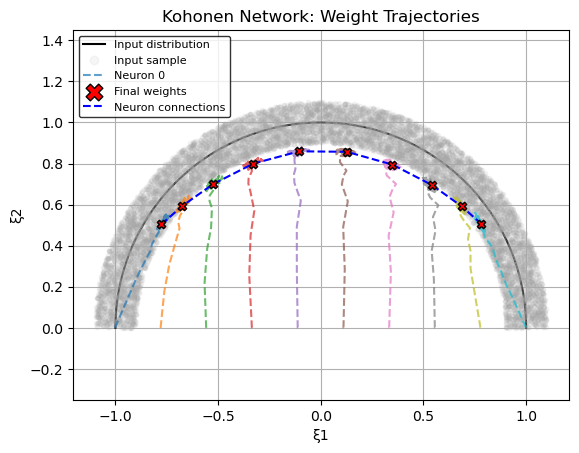

In [4]:
network = KohonenNetwork(num_neurons=10, eta=0.01, sigma=2, num_iterations=10000)
network.train()
network.plot()

### Sigma de vecindad igual a 1


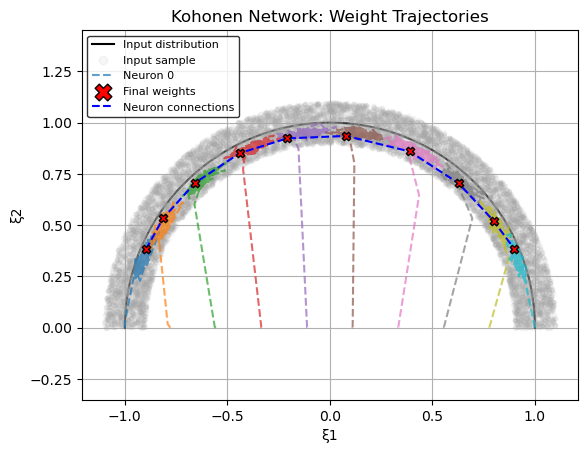

In [5]:
network = KohonenNetwork(num_neurons=10, eta=0.1, sigma=1, num_iterations=10000)
network.train()
network.plot()

### Sigma de vecindad igual a 0.5

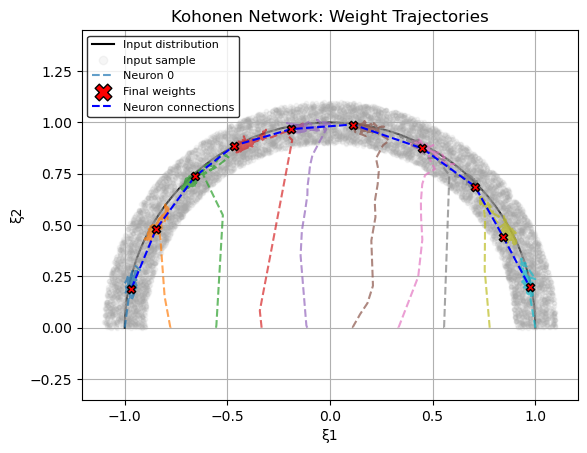

In [6]:
network = KohonenNetwork(num_neurons=10, eta=0.1, sigma=0.5, num_iterations=10000)
network.train()
network.plot()

### Sigma de vecindad igual a 0.1


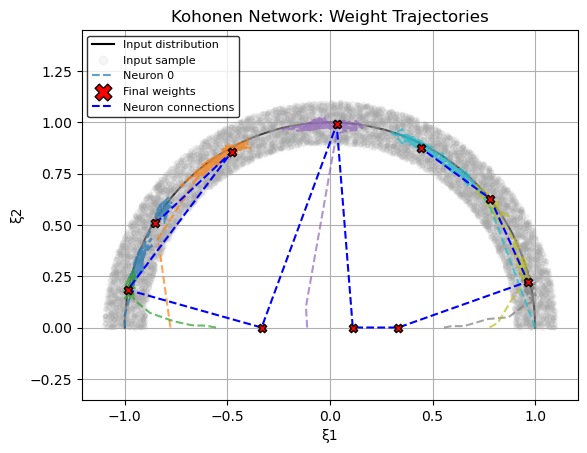

In [7]:
network = KohonenNetwork(num_neurons=10, eta=0.1, sigma=0.1, num_iterations=10000)
network.train()
network.plot()

### Con Aprendizaje variable

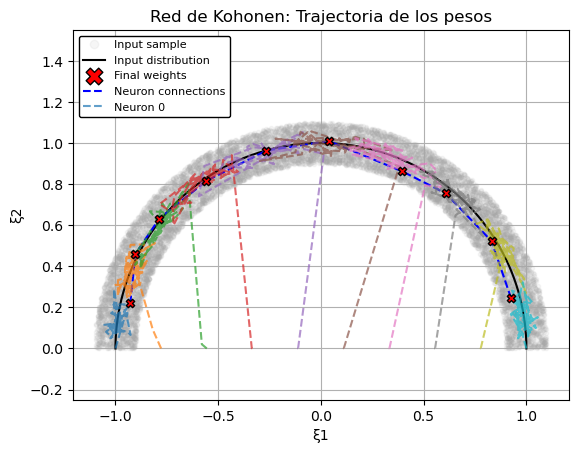

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Input distribution parameters
r_min, r_max = 0.9, 1.1
theta_min, theta_max = 0, np.pi

# Kohonen network parameters
num_neurons = 10  # Number of output neurons
learning_rate = 0.5  # Initial learning rate
sigma_initial = 1.0  # Initial neighborhood width
num_iterations = 10000  # Number of training steps
sigma_decay = 0.005  # Decay rate for sigma

# Generate random inputs from the defined distribution
def generate_input():
    r = np.random.uniform(r_min, r_max)
    theta = np.random.uniform(theta_min, theta_max)
    return np.array([r * np.cos(theta), r * np.sin(theta)])

# Gaussian neighborhood function
def gaussian_neighborhood(i, i_star, sigma):
    # limit the overflow when sigma is too small
    if sigma < 1e-10:
        return 0
    return np.exp(-((i - i_star) ** 2) / (2 * sigma ** 2))

# Initialize weights randomly
# First column: ξ1, Second column: ξ2
# xi1 = np.random.uniform(r_min, r_max, num_neurons)
# xi2 = np.random.uniform(theta_min, theta_max, num_neurons)
xi1 = np.linspace(-1, 1, num_neurons) # Initial weights for ξ1
xi2 = np.ones(num_neurons) * 0  # Initial weights for ξ2
weights = np.concatenate([xi1.reshape(-1, 1), xi2.reshape(-1, 1)], axis=1)


# To store trajectories of the weights
weight_trajectories = [weights.copy()]

# input vector generated by function
# xi = generate_input()
xi = np.array([generate_input() for _ in range(num_iterations)])

# Training loop
for t in range(num_iterations):
    # Decay
    eta = learning_rate * (1 - t / num_iterations)
    sigma = sigma_initial * np.exp(-t * sigma_decay)

    # Find the winning neuron (closest weight vector)
    distances = np.linalg.norm(xi[t,:] - weights, axis=1)
    i_star = np.argmax(-distances)
    
    # Update weights of each neuron
    for i in range(num_neurons):
        neighborhood_effect = gaussian_neighborhood(i, i_star, sigma)
        weights[i] += neighborhood_effect * eta * (xi[t,:] - weights[i,:])
    
    # Save weight positions at regular intervals
    if t % 100 == 0:  # Record every 100 iterations
        weight_trajectories.append(weights.copy())

# Plot results
# Input space (distribution)
theta = np.linspace(theta_min, theta_max, 300)
r = (r_min + r_max) / 2
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(xi[:,0], xi[:,1], '.', color="darkgray", label="Input sample",alpha=0.1)
plt.plot(x, y, label="Input distribution", color="black")

# Final weights
weights_x, weights_y = weights[:, 0], weights[:, 1]
plt.scatter(weights_x, weights_y, color="red", label="Final weights", edgecolors="black", marker="X", zorder=15)

# Neuron connections (final positions)
plt.plot(weights_x, weights_y, linestyle="--", color="blue", label="Neuron connections")


# Plot weight trajectories
for neuron in range(num_neurons):
    trajectory = np.array([w[neuron] for w in weight_trajectories])
    plt.plot(trajectory[:, 0], trajectory[:, 1], linestyle="--", alpha=0.7, label=f"Neuron {neuron}" if neuron == 0 else None)


plt.title("Red de Kohonen: Trajectoria de los pesos")
plt.xlabel("ξ1")
plt.ylabel("ξ2")
plt.axis("equal")
# Make the legend more readable and opaque
legend = plt.legend(loc="upper left", fontsize=8, markerscale=2, facecolor="white", edgecolor="black")
legend.get_frame().set_alpha(1)
plt.grid()
ax = plt.gca()
ax.set_ylim(-0.1, 1.4)

plt.show()

